<a href="https://colab.research.google.com/github/bhowad-akash/Machine-Learning/blob/main/Simple_Image_Classifier_using_MLPs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import tensorflow as tf
print(keras.__version__)
print(tf.__version__)

2.15.0
2.15.0


Using Fashion MNIST dataset privided by Keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
#Normalizing the data by scaling pixel values from the range 0-255 to the range of 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

<function matplotlib.pyplot.show(close=None, block=None)>

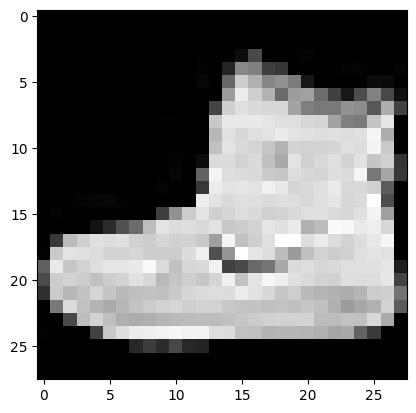

In [6]:
#Showing the image
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = 'gray')
plt.show

In [7]:
#Building an MLP classifier using a Sequential Model from Keras
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
#Compiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [9]:
#Model Training
model_history = model.fit(x_train, y_train, epochs=30, validation_split=0.1)

Epoch 1/30
1688/1688 [==============================] - 27s 15ms/step - loss: 0.7249 - accuracy: 0.7632 - val_loss: 0.5035 - val_accuracy: 0.8237
Epoch 2/30
1688/1688 [==============================] - 21s 12ms/step - loss: 0.4892 - accuracy: 0.8305 - val_loss: 0.4744 - val_accuracy: 0.8287
Epoch 3/30
1688/1688 [==============================] - 11s 6ms/step - loss: 0.4414 - accuracy: 0.8454 - val_loss: 0.4547 - val_accuracy: 0.8357
Epoch 4/30
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4143 - accuracy: 0.8553 - val_loss: 0.4535 - val_accuracy: 0.8390
Epoch 5/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3954 - accuracy: 0.8615 - val_loss: 0.3985 - val_accuracy: 0.8570
Epoch 6/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3788 - accuracy: 0.8669 - val_loss: 0.3801 - val_accuracy: 0.8607
Epoch 7/30
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3664 - accuracy: 0.8719 - val_loss: 0.3916 - val_accu

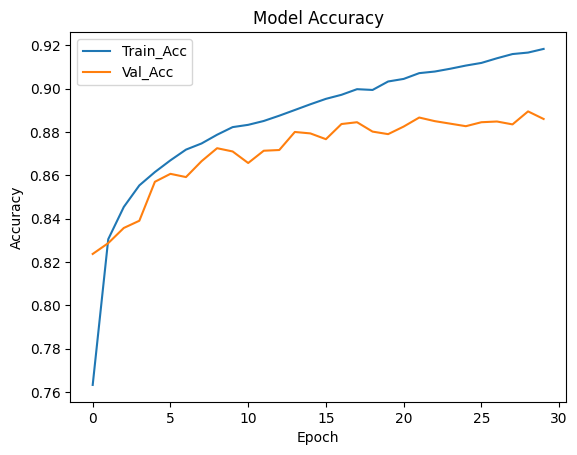

In [10]:
#Visualising Training and Validation Accuracy
import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train_Acc', 'Val_Acc'], loc='upper left')
plt.show()

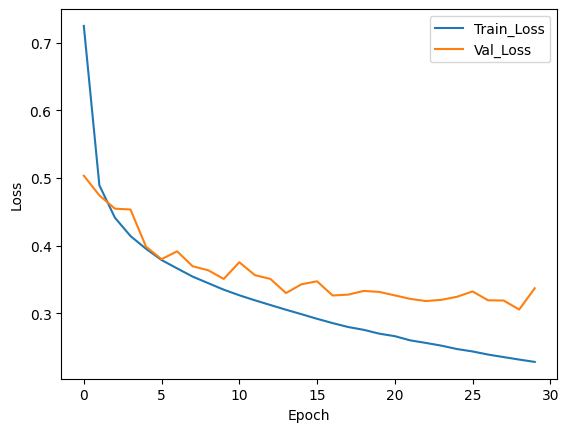

In [11]:
#Visualising Training and Validation Loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train_Loss', 'Val_Loss'], loc='upper right')

In [12]:
#Evaluating the model on the test data
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3627 - accuracy: 0.8714


[0.36269477009773254, 0.871399998664856]

## ***Batch Normalisation***

In [14]:
#Batch Normalisation
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_3 (Bat  (None, 784)               3136      
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 batch_normalization_4 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 batch_normalization_5 (Bat  (None, 100)              

In [18]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')

In [19]:
model_history = model.fit(x_train, y_train, epochs = 30, validation_split=0.1)

Epoch 1/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.5349 - accuracy: 0.8149 - val_loss: 0.3833 - val_accuracy: 0.8623
Epoch 2/30
1688/1688 [==============================] - 13s 7ms/step - loss: 0.3941 - accuracy: 0.8600 - val_loss: 0.3633 - val_accuracy: 0.8655
Epoch 3/30
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3522 - accuracy: 0.8727 - val_loss: 0.3398 - val_accuracy: 0.8783
Epoch 4/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.3275 - accuracy: 0.8824 - val_loss: 0.3359 - val_accuracy: 0.8767
Epoch 5/30
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3052 - accuracy: 0.8889 - val_loss: 0.3275 - val_accuracy: 0.8803
Epoch 6/30
1688/1688 [==============================] - 12s 7ms/step - loss: 0.2869 - accuracy: 0.8965 - val_loss: 0.3210 - val_accuracy: 0.8855
Epoch 7/30
1688/1688 [==============================] - 12s 7ms/step - loss: 0.2739 - accuracy: 0.9004 - val_loss: 0.3170 - val_ac

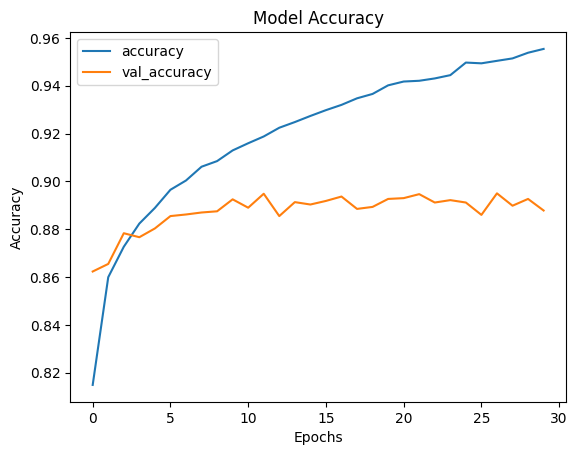

In [24]:
#Plotting Training and Validation Accuracy (Batch-Normalisation)
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

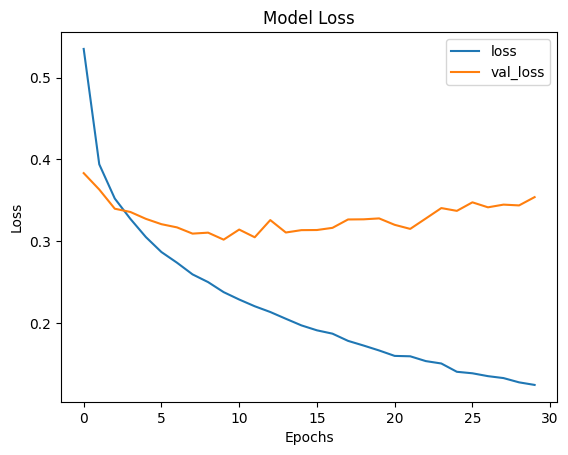

In [26]:
#Plotting Training and Validation Loss (Batch-Normalisation)
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()

In [28]:
#Evaluating the Model (Batch-Optimization)
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3850 - accuracy: 0.8859


[0.3849768042564392, 0.8859000205993652]

## ***ADAM Optimizer***

In [29]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_6 (Bat  (None, 784)               3136      
 chNormalization)                                                
                                                                 
 dense_9 (Dense)             (None, 300)               235500    
                                                                 
 batch_normalization_7 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 batch_normalization_8 (Bat  (None, 100)              

In [31]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), metrics='accuracy')

In [33]:
model_history = model.fit(x_train, y_train, epochs=30, validation_split=0.1)

Epoch 1/30
1688/1688 [==============================] - 23s 12ms/step - loss: 0.4741 - accuracy: 0.8296 - val_loss: 0.3672 - val_accuracy: 0.8645
Epoch 2/30
1688/1688 [==============================] - 16s 10ms/step - loss: 0.3617 - accuracy: 0.8675 - val_loss: 0.3294 - val_accuracy: 0.8782
Epoch 3/30
1688/1688 [==============================] - 16s 9ms/step - loss: 0.3297 - accuracy: 0.8775 - val_loss: 0.3092 - val_accuracy: 0.8867
Epoch 4/30
1688/1688 [==============================] - 17s 10ms/step - loss: 0.3039 - accuracy: 0.8872 - val_loss: 0.3037 - val_accuracy: 0.8835
Epoch 5/30
1688/1688 [==============================] - 16s 9ms/step - loss: 0.2792 - accuracy: 0.8942 - val_loss: 0.3100 - val_accuracy: 0.8885
Epoch 6/30
1688/1688 [==============================] - 15s 9ms/step - loss: 0.2649 - accuracy: 0.9015 - val_loss: 0.3069 - val_accuracy: 0.8898
Epoch 7/30
1688/1688 [==============================] - 15s 9ms/step - loss: 0.2522 - accuracy: 0.9059 - val_loss: 0.3025 - val

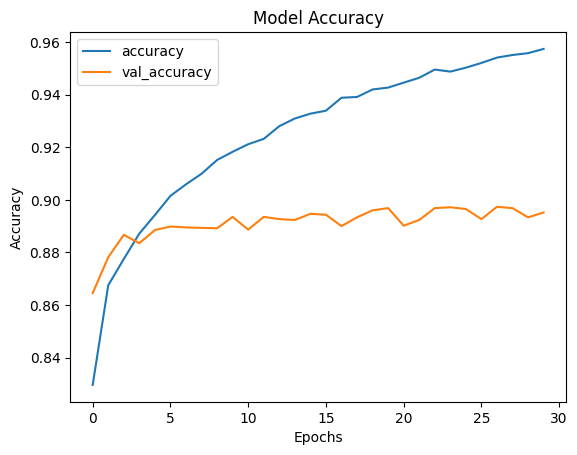

In [34]:
#Visualising Training Accuracy with ADAM and Batch Normalization
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')

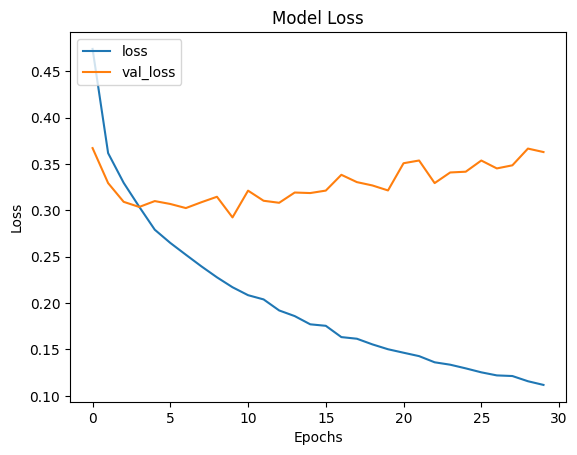

In [35]:
#Visualising Loss with ADAM and Batch Normalization
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(['loss', 'val_loss'], loc='upper left')

In [36]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4023 - accuracy: 0.8933


[0.40234071016311646, 0.8932999968528748]